In [1]:
import  numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [34]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
data = pd.read_csv("D:\MachineLearning\A-Z Machine Learning\P14-Part3-Classification\Section 18 - Support Vector Machine (SVM)\Python\Social_Network_Ads.csv")

In [7]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [9]:
data = data.drop("User ID", axis=1)

In [10]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [27]:
Male_count = data[data['Gender'] == 'Male'].Gender.count()
Male_count

196

In [28]:
Female_count = data[data['Gender'] == 'Female'].Gender.count()
Female_count

204

In [29]:
Gender_count = 196 + 204
Gender_count

400

In [30]:
Male_percent = Male_count / Gender_count * 100
Male_percent

49.0

In [31]:
Female_percent = Female_count / Gender_count * 100
Female_percent

51.0

In [32]:
Gender_data = {'Gender' : ['Male', 'Female'],
               'Percentage' : [49, 51]}

In [33]:
Gender_df = pd.DataFrame(Gender_data)
Gender_df

,Gender,Percentage
0,Male,49
1,Female,51


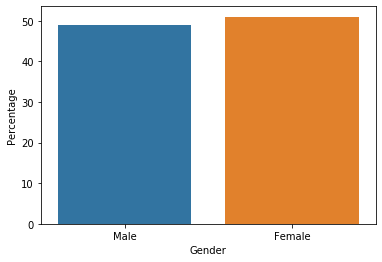

In [35]:
sns.barplot(x='Gender', y= 'Percentage', data=Gender_df)

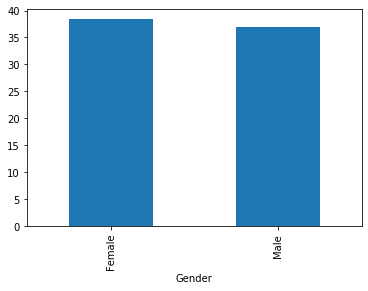

In [59]:
data.groupby('Gender')['Age'].mean().plot.bar()

In [64]:
data['EstimatedSalary'].max()

150000

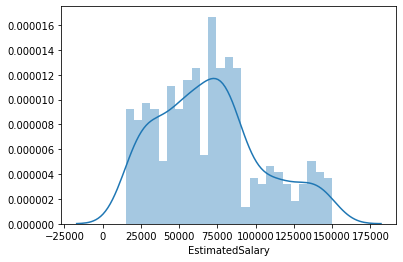

In [66]:
sns.distplot(data['EstimatedSalary'], bins=25)

In [69]:
data['EstimatedSalary'].mean()

69742.5

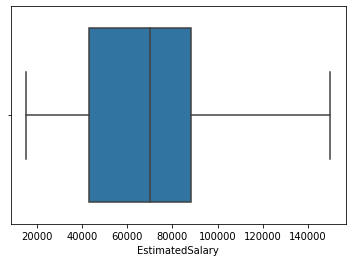

In [71]:
sns.boxplot('EstimatedSalary', data=data)

In [97]:
data.loc[data['Age'] > 35, ['EstimatedSalary']].mean()


EstimatedSalary    74626.126126
dtype: float64

In [98]:
data.groupby('Gender')['EstimatedSalary'].max()

Gender
Female    150000
Male      150000
Name: EstimatedSalary, dtype: int64

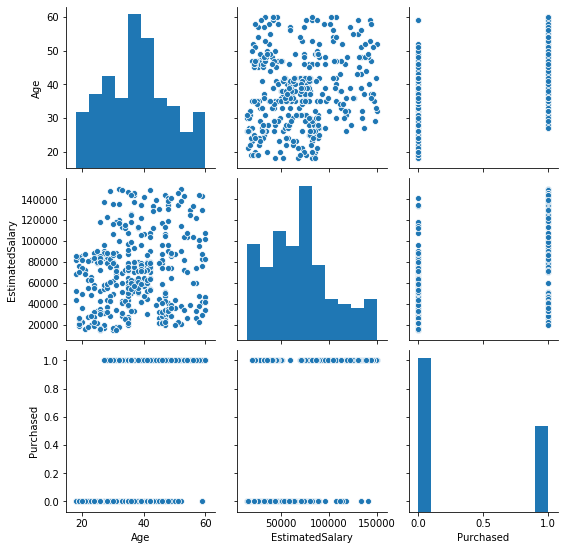

In [99]:
sns.pairplot(data)

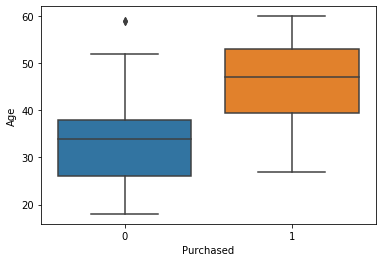

In [100]:
sns.boxplot(x = 'Purchased', y = 'Age', data=data)

In [101]:
data[data['Purchased'] == 1].mean()

Age                   46.391608
EstimatedSalary    86272.727273
Purchased              1.000000
dtype: float64

In [102]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


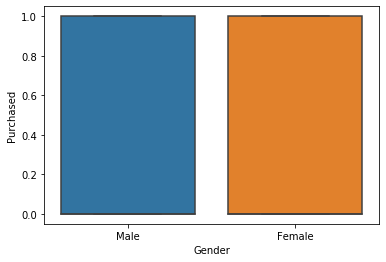

In [105]:
sns.boxplot(x = 'Gender', y = 'Purchased', data=data)

In [106]:
x = data.iloc[:, :-1]
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [107]:
y = data.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()

In [110]:
x.iloc[:, 1:] = sc.fit_transform(x.iloc[:, 1:])

In [111]:
x

,Gender,Age,EstimatedSalary
0,Male,-1.781797,-1.490046
1,Male,-0.253587,-1.460681
2,Female,-1.113206,-0.785290
3,Female,-1.017692,-0.374182
4,Male,-1.781797,0.183751
...,...,...,...
395,Female,0.797057,-0.844019
396,Male,1.274623,-1.372587
397,Female,1.179110,-1.460681
398,Male,-0.158074,-1.078938


In [112]:
Gender_dummy = pd.get_dummies(data['Gender'], drop_first=True)
Gender_dummy

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [113]:
x = x.drop('Gender', axis=1)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [114]:
x = pd.concat([x , Gender_dummy], axis=1)
x

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1
1,-0.253587,-1.460681,1
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,1
...,...,...,...
395,0.797057,-0.844019,0
396,1.274623,-1.372587,1
397,1.179110,-1.460681,0
398,-0.158074,-1.078938,1


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [117]:
from sklearn.svm import SVC

In [118]:
svm = SVC(kernel='linear', random_state=0)

In [119]:
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [120]:
y_pred = svm.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [121]:
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
confusion_matrix(y_test, y_pred)

array([[57,  1],
       [ 6, 16]], dtype=int64)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
parameters = [{'C' : [1, 10, 100, 1000], 
              'kernel' : ['linear']},
             {'C' : [1, 10, 100, 1000],
              'kernel' : ['rbf'],
              'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]    
             }]

In [126]:
parameters

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [1, 10, 100, 1000],
  'kernel': ['rbf'],
  'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [127]:
grid_search = GridSearchCV(estimator= svm, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

In [128]:
grid_search = grid_search.fit(x_train, y_train)

In [129]:
accuracy = grid_search.best_score_

In [130]:
accuracy

0.903125

In [131]:
params = grid_search.best_params_

In [132]:
params

{'C': 10, 'gamma': 0.4, 'kernel': 'rbf'}

In [133]:
svm = SVC(C= 10,kernel='rbf',gamma=0.4, random_state=0)

In [134]:
svm.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [135]:
new_y_pred = svm.predict(x_test)
new_y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [136]:
confusion_matrix(y_test, new_y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [137]:
print(classification_report(y_test, new_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

